In [40]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import os
import requests
import json
from utils import readGeodatafromFile, writeGeodataToGis, plotBaseMap, getUsualBbox

In [ ]:
def score():


    bbox = (-8.44896,40.17894,-8.38804,40.22520)
    bbox1=(-942000.6,4891166.6,-933027.4,4900545.5)
    crs="EPSG:3857"

    score2 = "./datasets/buildings/score/score2/"
    score = "./datasets/buildings/score/score/"

    path = "./datasets/pois/"
    rest = "/final/clustersDBSCAN400.shp"
    types =  ["comercio", "educacao", "infraestrutura", "lazer", "saude"]

    axis=plotBaseMap()

    comercio = readGeodatafromFile(score2 + "comercio.shp",bbox1,crs)
    infraestrutura = readGeodatafromFile(score2 + "infraestrutura.shp",bbox1,crs)
    educacao = readGeodatafromFile(score2 + "educacao.shp",bbox1,crs)
    lazer = readGeodatafromFile(score2 + "lazer.shp",bbox1,crs)
    saude = readGeodatafromFile(score2 + "saude.shp",bbox1,crs)

    comercio.plot(ax=axis, color='green',label="Commerce",alpha=0.6)
    infraestrutura.plot(ax=axis, color='red', label="Infraestructure",alpha=0.6)
    educacao.plot(ax=axis, color='blue', label="Education",alpha=0.6 )
    lazer.plot(ax=axis, color='yellow', label="Leisure" ,alpha=0.6)
    saude.plot(ax=axis, color='purple', label="Health" ,alpha=0.6)

    comercio = readGeodatafromFile(path + "comercio" + rest,bbox1,crs)
    infraestrutura = readGeodatafromFile(path + "infraestrutura" + rest,bbox1,crs)
    educacao = readGeodatafromFile(path + "educacao" + rest,bbox1,crs)
    lazer = readGeodatafromFile(path + "lazer" + rest,bbox1,crs)
    saude = readGeodatafromFile(path + "saude" + rest,bbox1,crs)

    comercio.plot(ax=axis,marker='.', color='green', markersize=70, label="Commerce" ,alpha=1)
    infraestrutura.plot(ax=axis,marker='.', color='red', markersize=70, label="Infraestructure" ,alpha=1)
    educacao.plot(ax=axis,marker='.', color='blue', markersize=70,label="Education" ,alpha=1)
    lazer.plot(ax=axis,marker='.', color='yellow', markersize=70,label="Leisure" ,alpha=1)
    saude.plot(ax=axis,marker='.', color='purple', markersize=70,label="Health",alpha=1)

    plt.legend(loc="upper right")
    plt.show()

def main():
    poisFile="./datasets/pois/pois.shp"
    poisComercioFile="./datasets/pois/comercio/points/points.shp"
    clustersFile="./datasets/pois/testesClustering/DBSCAN400.shp"
    centroidsFile="./datasets/pois/testesClustering/clustersDBSCAN400.shp"
    bbox = (-8.44896,40.17894,-8.38804,40.22520)
    bbox1=(-942000.6,4891166.6,-933027.4,4900545.5)
    crs="EPSG:3857"
    #crs="EPSG:4326"

    pois=readGeodatafromFile(poisFile,bbox,crs)
    poisComercio=readGeodatafromFile(poisComercioFile,bbox,crs)
    poisClusters=readGeodatafromFile(clustersFile,bbox1,crs)
    clusters=readGeodatafromFile(centroidsFile,bbox1,crs)

    test1=readGeodatafromFile("./datasets/pois/testesClustering/points4.shp",bbox1,crs)
    test1Clusters=readGeodatafromFile("./datasets/pois/testesClustering/clusters4.shp",bbox1,crs)
    
    test2=readGeodatafromFile("./datasets/pois/testesClustering/points2.shp",bbox1,crs)
    test2Clusters=readGeodatafromFile("./datasets/pois/testesClustering/clusters2.shp",bbox1,crs)

    test3=readGeodatafromFile("./datasets/pois/testesClustering/points3.shp",bbox1,crs)
    test3Clusters=readGeodatafromFile("./datasets/pois/testesClustering/clusters3.shp",bbox1,crs)
    """
    axis=plotBaseMap()
    pois.plot(ax=axis,marker='.', color='green', markersize=70,label="POI")
    plt.legend()
    plt.show()

    axis=plotBaseMap()
    poisComercio.plot(ax=axis,marker='.', color='green', markersize=70,label="Commerce POI")
    plt.legend()
    plt.show()
    
    
    axis=plotBaseMap()
    poisClusters.plot(column='clusterID', ax=axis, marker='.', markersize=70, cmap='Set1')
    clusters.plot(ax=axis, marker="*", markersize=150,color="Black")
    plt.show()

    axis=plotBaseMap()
    poisClusters.plot(column='clusterID', ax=axis, marker='.', markersize=70, cmap='Set1',label='Point of Interest')
    clusters.plot(ax=axis, marker="*", markersize=150,color="Black",label='Centroid')
    plt.legend()
    plt.show()
    
    axis=plotBaseMap()
    test1.plot(column='clusterID', ax=axis, marker='.', markersize=70, cmap='Set1',label='Point of Interest')
    test1Clusters.plot(ax=axis, marker="*", markersize=150,color="Black",label='Centroid')
    plt.legend()
    plt.show()
    
    axis=plotBaseMap()
    test2.plot(column='clusterID', ax=axis, marker='.', markersize=70, cmap='Set1',label='Point of Interest')
    test2Clusters.plot(ax=axis, marker="*", markersize=150,color="Black",label='Centroid')
    plt.legend()
    plt.show()

    axis=plotBaseMap()
    test3.plot(column='clusterID', ax=axis, marker='.', markersize=70, cmap='Set1',label='Point of Interest')
    test3Clusters.plot(ax=axis, marker="*", markersize=150,color="Black",label='Centroid')
    plt.legend()
    plt.show()
    
    classes=["comercio","educacao","infraestrutura","lazer","saude"]
    for name in classes:
        data=readGeodatafromFile("./datasets/pois/{}/points/points.shp".format(name),bbox,crs)
        print("{} {}".format(name,len(data)))
    
    """
    buildings=readGeodatafromFile("./datasets/buildings/Coimbra/comercio/comercio.shp",bbox1,crs)
    axis=plotBaseMap()
    buildings.plot(ax=axis, color='coral', edgecolor='coral',alpha=0.6,legend=True,label='Commerce Zone Building')
    #clusters.plot(ax=axis, marker="*", markersize=150,color="Black",label='Centroid')
    LegendElement = [
        
        mpatches.Patch(facecolor='coral', edgecolor='coral', label='Commerce Zone Building')]
    axis.legend(handles = LegendElement, loc='upper right')
    plt.show()
    
    """
    stops=readGeodatafromFile("./datasets/bus/stops.shp",bbox,crs)
    axis=plotBaseMap()
    stops.plot(ax=axis,marker="^", color='blue', edgecolor='blue',label='Bus Stop',markersize=10)
    plt.legend()
    plt.show()
    
    print(len(stops))
    
    travelTimes=readGeodatafromFile("./datasets/buildings/travelTimes/buildings.shp",bbox1,crs)
    travelTimes=travelTimes.loc[travelTimes['time']<10]
    axis=plotBaseMap()
    travelTimes.plot(column='time', ax=axis, cmap='afmhot',legend=True,alpha=0.6)
    plt.legend()
    plt.show()
    """

def stopsToGeodataframe():
    bbox=(-9.50152,38.84014,-9.06988,38.67876)
    bbox1=(-1057675,4675615,-1009567,4698915) #LX swag

    crs="EPSG:3857"
    crs1="EPSG:4326"

    newBusDir="./datasets/bus/Lisboa/stops.shp"
    
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = """
    [out:json];
    node
    [highway=bus_stop]
    ({},{},{},{});
    out;
    """.format(bbox[3],bbox[0],bbox[1],bbox[2])
    response = requests.get(overpass_url, 
                            params={'data': overpass_query})
    data = response.json()

    dicti={"geometry":[],"id":[]}
    for i,element in enumerate(data['elements']):
        x=element['lon']
        y=element['lat']
        point=Point(x,y)
        dicti['geometry']=dicti.get('geometry',[])+[point]
        dicti['id']=dicti.get('id',[])+[i]
        
    gdf=gpd.GeoDataFrame(data=dicti,crs=crs1)
    writeGeodataToGis(gdf, newBusDir,crs=crs)

if __name__=="__main__":
    pass


LISBON PLOTS

c:\Users\j13ma\anaconda3\envs\USys\lib\site-packages\geopandas\geodataframe.py:600: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
c:\Users\j13ma\anaconda3\envs\USys\lib\site-packages\geopandas\geodataframe.py:600: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
c:\Users\j13ma\anaconda3\envs\USys\lib\site-packages\geopandas\geodataframe.py:600: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
c:\Users\j13ma\anaconda3\envs\USys\lib\site-packages\geopandas\geodataframe.py:600: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
c:\Users\j13ma\anaconda3\envs\USys\lib\s

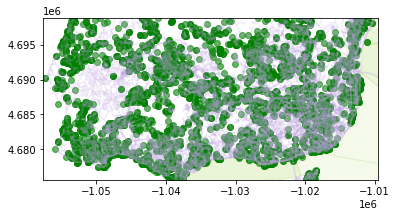

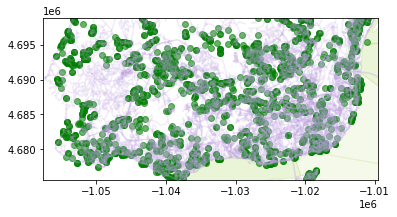

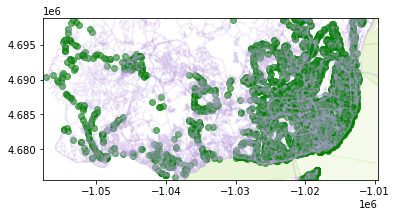

In [44]:
marcelino_roads = "C:/Users/j13ma/Desktop/Projetos/SU/DS01 QGISintro/portugal/"
images = '../plots/lisbon/'
roads = marcelino_roads + "roads.shp"
water = marcelino_roads +"water.shp"

images = '../plots/lisbon/'

lisbon, lisbon1 = getUsualBbox()
crs="EPSG:3857"

ax = plotBaseMap(roads, water, lisbon1, lisbon, crs)


types =  ["Lazer", "Industria", "Educacao", "Saude", "Turismo", "Comercio", "Servicos"]
file = "../datasets/pois/clusters/"
for i, type in enumerate(types):
    
    type_file = readGeodatafromFile(file + type + ".shp",lisbon,crs)
    type_file.plot(ax=ax, color='green',label=type,alpha=0.6)

plt.savefig(images + "poi.png")


ax = plotBaseMap(roads, water, lisbon1, lisbon, crs)
type_file = readGeodatafromFile(file + types[5] + ".shp",lisbon,crs)
type_file.plot(ax=ax, color='green',label=types[5],alpha=0.6)

plt.savefig(images + "comercio.png")

file = "../datasets/bus/Lisboa/"
ax = plotBaseMap(roads, water, lisbon1, lisbon, crs)
type_file = readGeodatafromFile(file + "stops.shp",lisbon,crs)
type_file.plot(ax=ax, color='green',label=types[5],alpha=0.6)

plt.savefig(images + "stops.png")